In [1]:
import notion_client
import pandas as pd
import os


NOTION_TOKEN = "secret_XekxjNm7Z9VR3M0zwHQjeOvtbDTUGXnXQJnA9JEWVRW"
DATABASE_ID = "188a5814563b8085be06f17bd3877231"

notion = notion_client.Client(auth=NOTION_TOKEN)

def fill_notion_form(data):
    """Fills a Notion database with the provided data."""
    new_page = {
        "parent": {"database_id": DATABASE_ID},
        "properties": {}
    }
    df = pd.DataFrame(data)
    for x in range(len(df)):
        new_page["properties"][df.iloc[x].index[0]] = {
            "type": "title",
                    "title": [
                        {
                            "type": "text",
                            "text": {
                                "content": df.iloc[x][0]
                            }
                        }
                    ]
        }
        new_page["properties"][df.iloc[x].index[1]] = {
                    "type": "number",
                    "number": float(df.iloc[x][1])  # Ensure it's a number
                }

        notion.pages.create(**new_page)
def find_row_by_name(name):
    """Finds a row in the Notion database by the 'Name' property."""
    response = notion.databases.query(
        **{
            "database_id": DATABASE_ID,
            "filter": {
                "property": "Name",
                "title": {
                    "equals": name
                }
            }
        }
    )

    results = response.get("results")
    if results:
        # Return the first result (assuming names are unique)
        return results[0]
    else:
        return None

def update_row(row_id, col_name, new_value):
    """Updates the specified row"""
    updated_page = {
        "properties": {
            col_name: {
                "type": "number",
                "number": new_value
            }
        }
    }

    # Update the page with the new data
    notion.pages.update(page_id=row_id, **updated_page)
def update_row_with_df(dict_new):
    df = pd.DataFrame(dict_new)
    for x in range(len(df)):
        name = df.iloc[x][0]
        value = df.iloc[x][1]
        col_name = df.iloc[x].index[1]
        row = find_row_by_name(name)
        if row:
            update_row(row["id"], col_name , float(value))
        else:
            temp_df = pd.DataFrame(df.iloc[x]).T
            fill_notion_form(temp_df)

https://developers.notion.com/docs/authorization#set-up-the-auth-flow-for-a-public-integration

<br> Go to this link and look at how to set up internal integration NOT PUBLIC

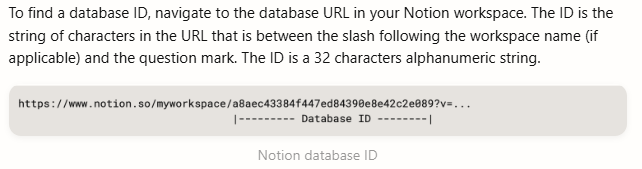

#### Code to Run

In [2]:
#TO DO:
#update date
date = "4/2"

In [3]:
csv_name = "_".join(date.split("/")) +".csv"
new_dict = {
    "Name": [],
    date : []
}
path = os.path.join(os.path.join(os.getcwd(),"Scores"),csv_name )
df = pd.read_csv(path)
df = df.drop("Timestamp", axis = 1)
for x in range(len(df)):
    name = df["Name"].values[x]
    new_dict["Name"].append(name)
    
    new_dict[date].append(df["Score"].values[x])
update_row_with_df(new_dict)